# Predictive bearing failure

## Achtergrond informatie

### Test opstelling
4 lagers zijn geinstalleerd aan een drijfas. De rotatiesnelheid is constant gehouden op 2000 RPM door een AC motor aangedreven door een drijfriem. Een lading van 2721.55 kg (6000 lbs) is toegevoegd en de lagers zijn continu ingesmeerd. Op de lagers zijn accelerometers geïnstalleerd zoals te zien in Figuur 1a. Een schematische afbeelding is te zien in Figuur 1b.

<table>
    <tr>
    <th> <img src="img/setup.png" style="width: 320px;"/>
    <th> <img src="img/setup_drawing.png" style="width: 320px;"/>
    </tr>
</table>  
Figuur 1. Opstelling van de lagers met de belasting en accelerometers (a) en Schematische weergave van de opstelling (b)

<table>
    <tr>
    <th> <img src="img/rol_element_fail.png" style="width: 240px;"/> 
    <th><img src="img/buitenring_failure.png" style="width: 240px;"/>
    </tr>
</table>
Figuur 2. Failures van rollagers. Links een failure van het rol element en rechts een failure van de buitenring

### Data structuur
Alleen de data van de laatste lager is beschikbaar. De data is een test-to-failure experiment en elk bestand bestaat uit een 1 seconde snapshot van het signaal. Die seconde is verdeeld in 20,480 datapunten (sample rate van 20 kHz). Alle bestanden staan in volgorde van vroeg naar laat. Dit betekent dat de gezondheid van alle lagers hetzelfde of slechter is dan de vorige. Dit mag je niet gebruiken als feature. Tussen bijna alle snapshots zit 10 minuten. 

De classes zijn:
- 0: Vroeg stadium
- 1: Normaal
- 2: Verdacht
- 3: Rol element failure
- 4: Failure

## Inlezen van data

In [1]:
from dataset.bearing_dataset import bearing_dataset
import os

In [2]:
ds = bearing_dataset(os.path.join("dataset", "data"), "bearing_conditions.csv")
N = len(ds)
print("Deze dataset bevat {} observaties".format(N))
n_samples = len(ds[0]) # gebruik index om het bestand te krijgen
print("Elke observatie is 1 seconde met {} samples".format(n_samples))

Deze dataset bevat 1724 observaties
Elke observatie is 1 seconde met 20480 samples


In [3]:
print(ds)

Class bearing_dataset with files from 'dataset\data' and size (1724,). It holds the following files: ['0.txt', '1.txt', '10.txt'] ... ['997.txt', '998.txt', '999.txt'].
Get full list of files with ds.files


In [4]:
ds.labels.sample(n = 10)

,b4
366,1
1109,2
1636,4
1129,2
1571,4
1572,4
1615,4
1346,3
833,2
1415,3


### Train test split

In [5]:
ds_train, ds_test = ds.train_test_split(test_size=0.3)
print("Trainsize = {}\nTestsize = {}".format(len(ds_train), len(ds_test)))

Trainsize = 1206
Testsize = 518


In [6]:
print(ds_train, "\n")
print(ds_test)

Class bearing_dataset with files from 'dataset\data' and size (1206,). It holds the following files: ['1404.txt', '1172.txt', '304.txt'] ... ['1180.txt', '131.txt', '1093.txt'].
Get full list of files with ds.files 

Class bearing_dataset with files from 'dataset\data' and size (518,). It holds the following files: ['940.txt', '517.txt', '866.txt'] ... ['1695.txt', '823.txt', '1571.txt'].
Get full list of files with ds.files


### Get signal

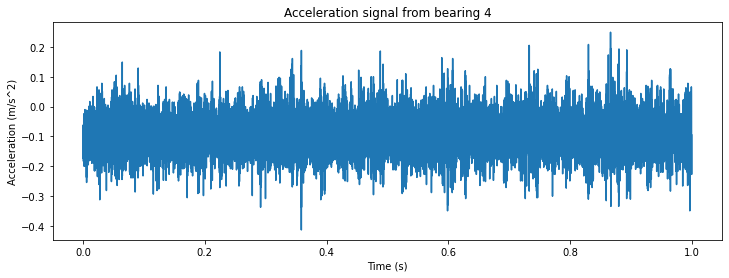

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (12, 4))

signal = ds_train[0]
t = np.linspace(0, 1, len(signal))
plt.plot(t, signal)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.title("Acceleration signal from bearing 4")
plt.show()

In [8]:
signal

0       -0.129
1       -0.115
2       -0.171
3       -0.112
4       -0.063
         ...  
20475   -0.134
20476   -0.227
20477   -0.151
20478   -0.151
20479   -0.095
Name: b4, Length: 20480, dtype: float64